In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from benchmarkrewriter.benchmark_parser import WorkerBenchmarkParser
import os

path_to_results = r'C:\Users\huda\Downloads\no_worker\no_worker\\'
#path_to_results = r'/home/dhu/Downloads/results/'


In [ ]:
ga_path = r'C:\Users\huda\Downloads\ga_worker_results\results.json'
#ga_path = r'/home/dhu/Downloads/results.json'
import json
with open(ga_path, 'r') as f:
    ga_data = json.loads(f.read())

In [10]:
from ast import literal_eval
files = [path_to_results + r'results_ortools.txt', path_to_results +r'results_cplex_cp.txt', path_to_results +r'results_gurobi.txt', path_to_results +r'results_hexaly.txt', path_to_results +r'results_cplex_lp.txt']
all_data = dict()
data_as_dict = dict()

for file in files:
    file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    df = pd.DataFrame(file_content)
    name = file.split('\\')[-1][8:-4]
    all_data[name] = df
    for index, row in df.iterrows():
        if row['name'].startswith('Error'):
            continue
        if name not in data_as_dict:
            data_as_dict[name] = dict()
        data_as_dict[name][row['name']] = row['fitness_value']

del df
del file_content

In [11]:
data_as_dict

{'ortools': {'.': 210.0},
 'cplex_cp': {'Behnke1': 90.0,
  'Behnke10': 128.0,
  'Behnke11': 234.0,
  'Behnke12': 225.0,
  'Behnke13': 235.0,
  'Behnke14': 237.0,
  'Behnke15': 234.0,
  'Behnke16': 424.0,
  'Behnke17': 413.0,
  'Behnke18': 413.0,
  'Behnke19': 417.0,
  'Behnke2': 91.0,
  'Behnke20': 410.0,
  'Behnke21': 85.0,
  'Behnke22': 87.0,
  'Behnke23': 85.0,
  'Behnke24': 87.0,
  'Behnke25': 87.0,
  'Behnke26': 114.0,
  'Behnke27': 125.0,
  'Behnke28': 114.0,
  'Behnke29': 118.0,
  'Behnke3': 91.0,
  'Behnke30': 121.0,
  'Behnke31': 229.0,
  'Behnke32': 226.0,
  'Behnke33': 227.0,
  'Behnke34': 224.0,
  'Behnke35': 215.0,
  'Behnke36': 391.0,
  'Behnke37': 399.0,
  'Behnke38': 398.0,
  'Behnke39': 399.0,
  'Behnke4': 97.0,
  'Behnke40': 422.0,
  'Behnke41': 87.0,
  'Behnke42': 87.0,
  'Behnke43': 86.0,
  'Behnke44': 84.0,
  'Behnke45': 87.0,
  'Behnke46': 116.0,
  'Behnke47': 117.0,
  'Behnke48': 125.0,
  'Behnke49': 113.0,
  'Behnke5': 91.0,
  'Behnke50': 124.0,
  'Behnke51': 22

In [4]:
def calculate_value(fitness, best):
    return ((fitness - best) / best)

In [5]:
def ecdf_inf(vectors, column, max : bool = False, n_instances : int = 402, labels : list[str] = [], instances : list[str] = [], x_lim = (-0.1, 1.0)):
    
    plot_vectors = []
    for vector in vectors:
        plot_vectors.append([[0.0],[0.0]])
        i = 1
        while i < len(vector):
            if vector[i] == float('inf'):
                break
            if vector[i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][0].append(vector[i-1])
            plot_vectors[-1][1].append((i-1)/n_instances)
            i += 1
    for i in range(len(vectors)):
        plt.plot(plot_vectors[i][0], plot_vectors[i][1], label=[labels[i]])
    plt.xlim(x_lim[0], x_lim[1])
    plt.legend()
    plt.grid(True, 'both')
    plt.title(column)
    plt.show()

In [12]:
plot_data = dict()
best_results = dict()
for key in data_as_dict['cplex_cp'].keys():
    best = float('inf')
    best_results[key] = best
    plot_data[key] = dict()
    for solver in data_as_dict.keys():
        if key in data_as_dict[solver] and data_as_dict[solver][key] < best:
            best = data_as_dict[solver][key]
            best_results[key] = best
    for solver in data_as_dict.keys():
        if key in data_as_dict[solver]:
            plot_data[key][solver] = calculate_value(data_as_dict[solver][key], best)
        else:
            plot_data[key][solver] = float('inf')

In [14]:
vectors = []
labels = []
for solver in data_as_dict.keys():
    labels.append(solver)
    vector = []
    for instance in data_as_dict['cplex_cp'].keys():
        vector.append(plot_data[instance][solver])
    vector.sort()
    vectors.append(vector)

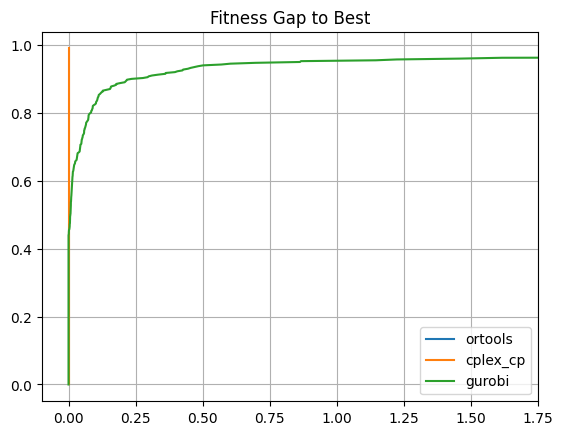

In [15]:
ecdf_inf(vectors, 'Fitness Gap to Best', labels=labels, x_lim=(-0.1, 1.75))